In [92]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Regressors

Here we want to improve the ML system and ask it not only to tell us whether a food is tasty or not, but also to predict how much other cats will like it, i.e. how they'll score it.

So we load a pre-prepared file with coded and scaled data.

In [93]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('output_classifiers.csv')

# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_oceon       121 non-null    float64
 8   salmon           121 non-null    float64
 9   mackerel         121 non-null    float64
 10  can              121 non-null    float64
 11  gravy            121 non-null    float64
 12  vegan            121 non-null    float64
 13  company_farmina  121 non-null    float64
 14  company_me-o     121 non-null    float64
 15  company_meat     121 non-null    float64
 16  company_purepet  121 non-null    float64
 17  company_purina  

This time we fix 'star_rating' as the target variable (y) and the remaining columns as features (X). Note that we have dropped 'star_rating' and 'yummy' from the features.

Then we split the data into training and test sets using train_test_split.

In [94]:
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
# Assuming 'price' is the target column, and you have other columns as features
X = df.drop(['star_rating','yummy'], axis='columns')  # Features
y = df['star_rating']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

To build and train a linear regression model on your dataset, assuming you already have training and test subsets, you can use the scikit-learn library in Python.

We import the LinearRegression class from scikit-learn and create a linear regression model using LinearRegression().

The model is trained on the training data using the fit method. 

Predictions are made on the test data using the predict method.

We evaluate the linear regression model using metrics such as Mean Squared Error (MSE) and R-squared (R2). These metrics provide insight into the performance of the model.

As we can see, the MSE is quite small. It seems that the model is OK.

!Note that the R2 is also small. This means that the variance of the traits explains only about 15% of the cats' preferences. The rest must be explained by other factors.

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Linear Regression model
linear_reg_model = LinearRegression()

# Step 2: Train the Linear Regression model on the training data
linear_reg_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = linear_reg_model.predict(X_test)

# Step 4: Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, linear_reg_model.predict(X_train)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.04
R-squared (R2) Score: 0.15


To display the coefficients of a trained linear regression model in scikit-learn, we access the coef_ attribute of the model. We also access the intercept using the intercept_ attribute.

As we can see, 'weight' is the most important factor for the model. It says that larger parcels are liked more. At the same time, the more expensive tins were liked less.

In [96]:
# Access and display the coefficients
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

print("Coefficients:")
for feature, coefficient in zip(X_train.columns, coefficients):
    print(f"{feature}: {coefficient}")

print(f"Intercept: {intercept}")

Coefficients:
price: -0.11139267033922519
weight: 0.23573573913821286
total_comments: -0.07235868992971517
adult: 0.013223885313307322
chicken: 0.01370233021875358
wet: -0.03749833699818841
from_oceon: 0.06895909203872339
salmon: -0.03259279031798547
mackerel: -0.03699621501768863
can: -0.059801301468980536
gravy: -0.09462815343088973
vegan: 0.03673515671504972
company_farmina: 0.07188803961762304
company_me-o: -0.0350078534150637
company_meat: -0.05002421361355738
company_purepet: -0.20820698485901618
company_purina: -0.14065059743630481
company_royal: 0.17721285000559356
company_sheba: 0.08944811139396601
company_whiskas: 0.09534064830675949
Intercept: 0.626705396663304


Here we visualise a dependency between 'price' and 'rating' for actual and predicted values.

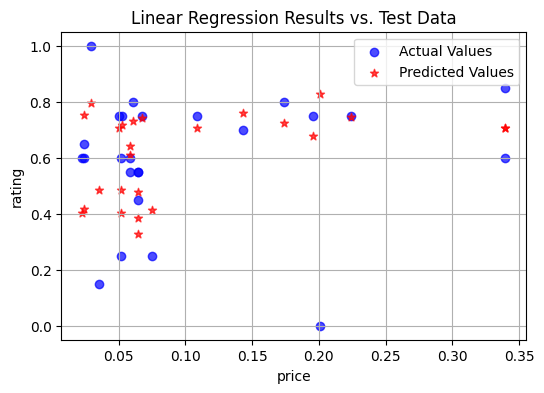

In [97]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(6, 4))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='*')
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Linear Regression Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

To plot the linear regression results against the test data, we use Matplotlib to create a scatterplot. 
We create a scatterplot by plotting the actual test values (y_test) on the x-axis and the predicted values (y_pred) on the y-axis; and plotting a diagonal line (y=x) in red to visualise perfect predictions.

Then we set the colour of the points to blue and label the x-axis as 'Actual Values (y_test)' and the y-axis as 'Predicted Values (y_pred)'. Next, we set the title of the plot to 'Actual vs. Predicted Values'. We also add grid lines to the plot to make it easier to read.

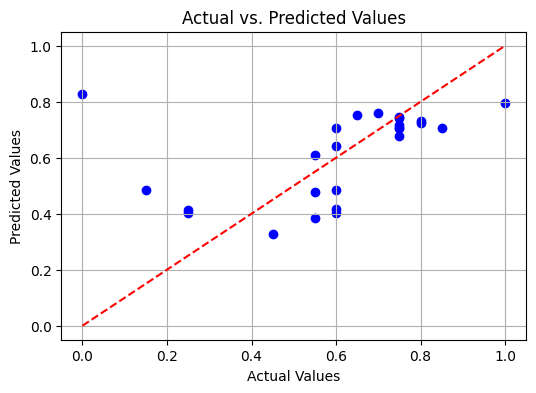

In [98]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

## Polynomial Features

To create and train a Polynomial Regression model on your data, assuming you already have training and test subsets, you can use scikit-learn's PolynomialFeatures to create polynomial features and then apply Linear Regression to the transformed data. 

We import PolynomialFeatures to create polynomial features and LinearRegression for the regression model. The degree variable determines the degree of the polynomial to fit. 

We create polynomial features for both the training and test data using fit_transform and transform. Next, we create a linear regression model (poly_reg_model) and train it on the polynomial features of the training data.

Predictions are made on the test data with polynomial features. We evaluate the polynomial regression model using Mean Squared Error (MSE) and R-squared (R2).

The polynomial model is overfitted. MSE is large, R2 is negative. This means that this model predicts worse than using the average as a predictor, in other words using common sense without any special procedure or knowledge.

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create Polynomial Features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Create and train a Linear Regression model on the polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Step 3: Make predictions on the test data
y_pred = poly_reg_model.predict(X_test_poly)

# Step 4: Evaluate the Polynomial Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, poly_reg_model.predict(X_train_poly)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.59
R-squared (R2) Score: -10.55


Here we visualise a dependency between 'price' and 'rating' for actual and predicted values.

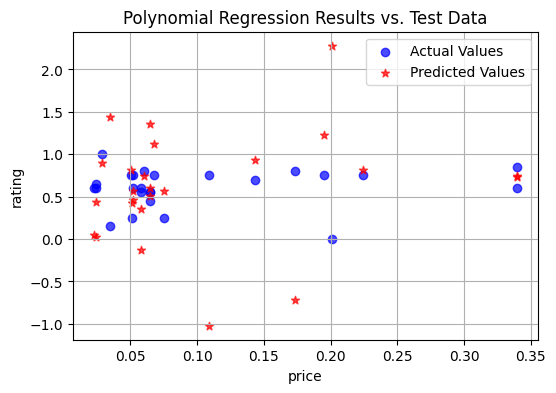

In [100]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(6, 4))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='*')
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Polynomial Regression Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

Here we plot the model results against the test data.

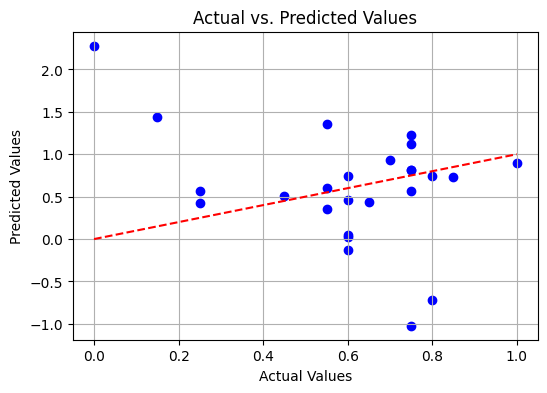

In [101]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

## Decision Tree Regressor

To build and train a decision tree regression model on the dataset, we use scikit-learn's DecisionTreeRegressor. 

We import DecisionTreeRegressor for regression tasks and mean_squared_error and r2_score for evaluation. We create a decision tree regression model (dt_regressor) with optional hyperparameter tuning by adjusting parameters such as max_depth, min_samples_split or others. 

The model is trained on the training data using the fit method. Predictions are made on the test data using the predict method.  We evaluate the decision tree regression model using the mean squared error (MSE) and the R-squared (R2) value.

This model is also overfitted. The MSE is large and the R2 is negative. This means that this model predicts worse than using the average as the predictor.

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed

# Step 2: Train the Decision Tree Regression model on the training data
dt_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = dt_regressor.predict(X_test)

# Step 4: Evaluate the Decision Tree Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, dt_regressor.predict(X_train)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.07
R-squared (R2) Score: -0.3


Here we visualise a dependency between 'price' and 'rating' for actual and predicted values.

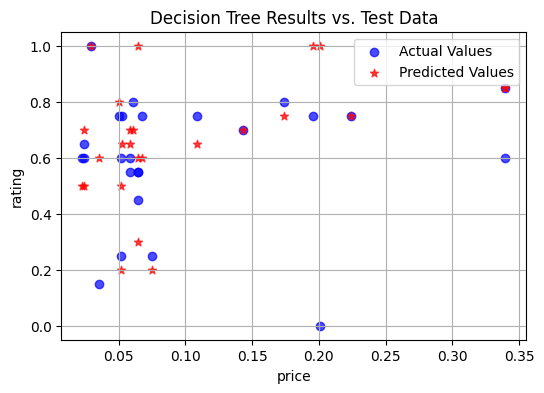

In [103]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(6, 4))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='*')
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Decision Tree Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

Here we plot the model results against the test data.

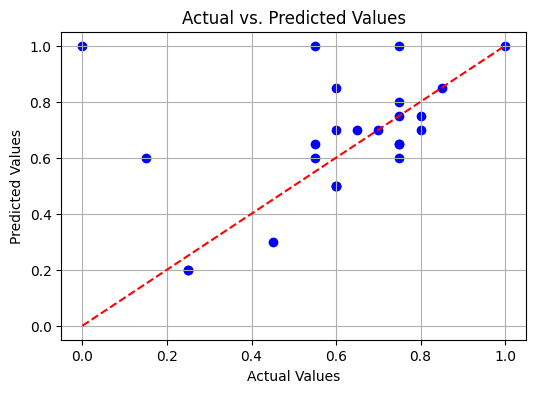

In [104]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

To display the feature importances for a trained decision tree regressor in scikit-learn, we use the feature_importances_ attribute of the model. 

We access the feature importances of the trained decision tree regressor using dt_regressor.feature_importances_ and get the feature names from the feature DataFrame (X_train).

Next, we create a DataFrame (importance_df) to store the feature names and their corresponding importances. We sort the features by their importance in descending order to display the most important features and use a horizontal bar chart to visualise the feature importance.

As we can see, 'total_comments' is the most important feature for this model.

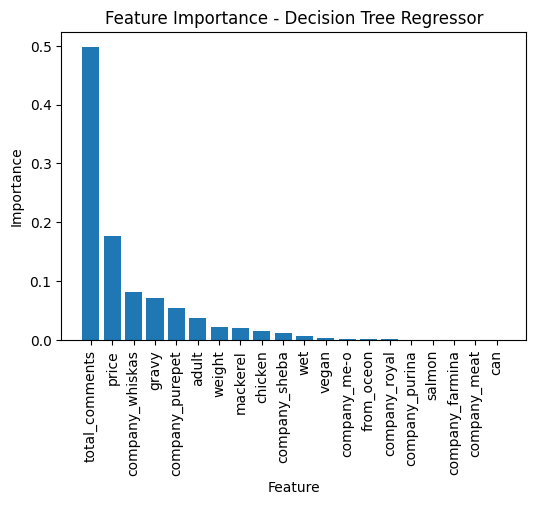

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Decision Tree Regressor
importances = dt_regressor.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace with your feature DataFrame (X_train)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create labels for feature importance visualization
feature_labels = [feature_names[i] for i in indices]

# Create a bar plot of feature importances
plt.figure(figsize=(6, 4))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_labels, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree Regressor')
plt.show()

## Random Forest Regressor

To build and train a random forest regression model on your dataset, assuming you already have training and test subsets, we use scikit-learn's RandomForestRegressor. 

We import RandomForestRegressor for regression tasks and mean_squared_error and r2_score for evaluation. We create a random forest regression model (rf_regressor) with optional hyperparameter tuning by adjusting parameters such as n_estimators, max_depth, or others.

The model is trained on the training data using the fit method. Predictions are made on the test data using the predict method.  We evaluate the random forest regression model using the mean squared error (MSE) and the R-squared (R2) value.

This model is also overfitted. The MSE is large and the R2 is negative. This means that this model predicts worse than using the average as the predictor.

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Step 2: Train the Random Forest Regression model on the training data
rf_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Step 4: Evaluate the Random Forest Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, rf_regressor.predict(X_train)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.06
R-squared (R2) Score: -0.12


Here we visualise a dependency between 'price' and 'rating' for actual and predicted values.

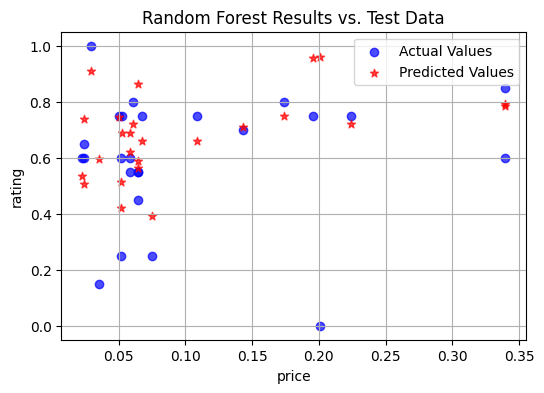

In [107]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(6, 4))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='*')
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Random Forest Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

Here we plot the model results against the test data.

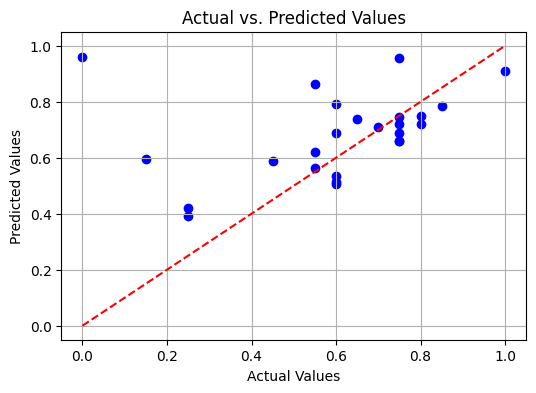

In [108]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

## Feed Forward Neural Network Regressor

To build and train a neural network (NN) regression model in Python, we use the TensorFlow library.

We define the architecture of the neural network using tf.keras.Sequential, which allows us to stack layers sequentially. Here we have two hidden layers with 64 neurons each and ReLU activation functions, followed by an output layer with 1 neuron for regression.

! Note that with 64 neurons in two hidden layers, the NN is overfitted. Read the manuals carefully before using deep NNs to solve your problems.

We build the model using the Adam optimiser and a mean squared error loss function suitable for regression tasks.

We train the model on the training data (X_train, y_train) for 100 epochs, specifying the validation data (X_test, y_test) for evaluation during training.

The training progress is stored in the history variable.

Finally, we evaluate the trained model on the test data and print the test loss.

In [109]:
import tensorflow as tf

# Define the architecture of the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100
3/3 [==============================] - 0s 55ms/step - loss: 0.5834 - val_loss: 0.3513
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.3600 - val_loss: 0.2090
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2016 - val_loss: 0.1191
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1094 - val_loss: 0.0779
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0609 - val_loss: 0.0754
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0524 - val_loss: 0.0917
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0629 - val_loss: 0.1042
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0655 - val_loss: 0.1014
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0561 - val_loss: 0.0904
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0441 - val_loss: 0.0778
Epoch 11/100
3/3 [=====

3/3 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0422
Epoch 85/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0037 - val_loss: 0.0421
Epoch 86/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0037 - val_loss: 0.0421
Epoch 87/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0420
Epoch 88/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0422
Epoch 89/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0426
Epoch 90/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0036 - val_loss: 0.0424
Epoch 91/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0036 - val_loss: 0.0425
Epoch 92/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.0424
Epoch 93/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0036 - val_loss: 0.0423
Epoch 94/100
3/3 [=======

This model is also overfitted. The MSE on the training set is significantly smaller than the MSE on the test set.

In [110]:
print("MSE", loss)

MSE 0.042901743203401566


In [111]:
model.evaluate(X_train, y_train)

3/3 [==============================] - 0s 3ms/step - loss: 0.0033


0.0033450729679316282

Here we plot the model results against the test data.

1/1 [==============================] - 0s 48ms/step


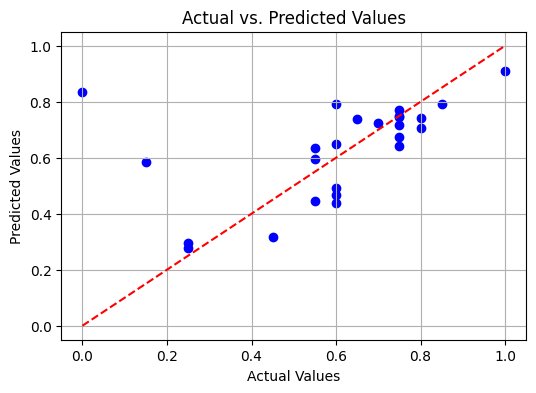

In [112]:
import matplotlib.pyplot as plt

# Predict on test data
predictions = model.predict(X_test).flatten()

# Plot predicted vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [113]:
!jupyter nbconvert 03_Regressors --to html

[NbConvertApp] Converting notebook 03_Regressors.ipynb to html
[NbConvertApp] Writing 1024875 bytes to 03_Regressors.html
